In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
y_test.shape

(10000,)

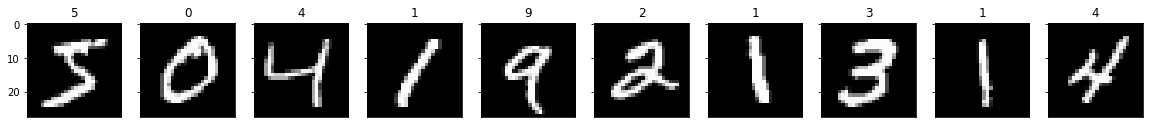

In [10]:
fig, axes = plt.subplots(ncols= 10,sharex=False,sharey=True, figsize=(20,4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)

plt.show()

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
# after converting categorical variable
print(y_test[3])
print(y_test.shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10000, 10)


In [47]:
#
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation= 'LeakyReLU'))
model.add(Dense(10, activation= 'LeakyReLU'))
model.add(Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 10)                650       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
Total params: 51,000
Trainable params: 51,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
utils.plot_model(model, show_shapes=True)

In [48]:
model.compile(loss= 'categorical_crossentropy',optimizer='adam', metrics= ['acc'] )

In [49]:
model.fit(x_train,y_train, epochs=12, validation_data= (x_test,y_test))

Epoch 1/12
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9276 - acc: 0.8439 - val_loss: 0.4993 - val_acc: 0.9046
Epoch 2/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4878 - acc: 0.9048 - val_loss: 0.5364 - val_acc: 0.8959
Epoch 3/12
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3628 - acc: 0.9200 - val_loss: 0.4370 - val_acc: 0.9037
Epoch 4/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2773 - acc: 0.9297 - val_loss: 0.2927 - val_acc: 0.9285
Epoch 5/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2459 - acc: 0.9362 - val_loss: 0.2713 - val_acc: 0.9333
Epoch 6/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2164 - acc: 0.9430 - val_loss: 0.2904 - val_acc: 0.9337
Epoch 7/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1914 - acc: 0.9485 - val_loss: 0.1781 - val_acc: 0.9539
Epoch 8/12
1875/1875 [==============================] - 6s 3ms

In [41]:
model.save('mnist_model.h5')  # we get 95 percent maximum accuracy with 'LeakyReLU' activation function

In [42]:
model.save('/content/drive/MyDrive/Colab Notebooks/mnist_model.h5')   # model save in google drive

In [50]:
#  train this model by sigmoid activation function to check how accuracy we get
model_2= Sequential()
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(64, activation= 'sigmoid'))
model_2.add(Dense(10, activation= 'sigmoid'))
model_2.add(Dense(10, activation= 'softmax'))
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 dense_30 (Dense)            (None, 10)                650       
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
Total params: 51,000
Trainable params: 51,000
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_2.compile(loss= 'categorical_crossentropy',optimizer='adam', metrics= ['acc'] )
model_2.fit(x_train,y_train, epochs=12, validation_data= (x_test,y_test))

Epoch 1/12
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1103 - acc: 0.7376 - val_loss: 0.6301 - val_acc: 0.8543
Epoch 2/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5399 - acc: 0.8596 - val_loss: 0.4460 - val_acc: 0.8818
Epoch 3/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4262 - acc: 0.8791 - val_loss: 0.3935 - val_acc: 0.8886
Epoch 4/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4070 - acc: 0.8819 - val_loss: 0.4101 - val_acc: 0.8752
Epoch 5/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3704 - acc: 0.8903 - val_loss: 0.3469 - val_acc: 0.8980
Epoch 6/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3534 - acc: 0.8942 - val_loss: 0.3261 - val_acc: 0.9041
Epoch 7/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3358 - acc: 0.8996 - val_loss: 0.3374 - val_acc: 0.9013
Epoch 8/12
1875/1875 [==============================] - 8s 4ms

In [ ]:
## we get maximum accuracy 90 percent with 'sigmoid' activation functions

In [53]:
## with Relu activation function
model_3= Sequential()
model_3.add(Flatten(input_shape=(28,28)))
model_3.add(Dense(64, activation= 'relu'))
model_3.add(Dense(10, activation= 'relu'))
model_3.add(Dense(10, activation= 'softmax'))
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 64)                50240     
                                                                 
 dense_36 (Dense)            (None, 10)                650       
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
Total params: 51,000
Trainable params: 51,000
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_3.compile(loss= 'categorical_crossentropy',optimizer='adam', metrics= ['acc'] )
model_3.fit(x_train,y_train, epochs=12, validation_data= (x_test,y_test))

Epoch 1/12
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2177 - acc: 0.1874 - val_loss: 2.1002 - val_acc: 0.1824
Epoch 2/12
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0362 - acc: 0.2042 - val_loss: 2.0033 - val_acc: 0.2092
Epoch 3/12
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0062 - acc: 0.2090 - val_loss: 2.0405 - val_acc: 0.2112
Epoch 4/12
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0019 - acc: 0.2090 - val_loss: 2.1228 - val_acc: 0.1787
Epoch 5/12
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9968 - acc: 0.2104 - val_loss: 1.9704 - val_acc: 0.2132
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9855 - acc: 0.2128 - val_loss: 1.9810 - val_acc: 0.2155
Epoch 7/12
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9734 - acc: 0.2257 - val_loss: 1.9754 - val_acc: 0.2190
Epoch 8/12
1875/1875 [==============================] - 6s 3ms

In [ ]:
# we get ver bad accuracy with 'relu' activation function
# best accuracy with 'LeakyReLU' compare to sigmoid  and relu